In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the CSV files
df_100_iters = pd.read_csv('metrics_results_maxIters_100.csv')
df_1000_iters = pd.read_csv('metrics_results_maxIters_1000.csv')
df_10000_iters = pd.read_csv('metrics_results_maxIters_10000.csv')
df_500_iters = pd.read_csv('metrics_results_maxIters_500.csv')
df_5000_iters = pd.read_csv('metrics_results_maxIters_5000.csv')
df_50000_iters = pd.read_csv('metrics_results_maxIters_50000.csv')

# Assigning iteration labels to each dataframe
df_100_iters['Iterations'] = '100'
df_1000_iters['Iterations'] = '1000'
df_10000_iters['Iterations'] = '10000'
df_500_iters['Iterations'] = '500' 
df_5000_iters['Iterations'] = '5000'
df_50000_iters['Iterations'] = '50000'

# Combine all datasets into one dataframe
df_combined = pd.concat([df_100_iters, df_1000_iters, df_10000_iters, df_500_iters, df_5000_iters, df_50000_iters], ignore_index=True)

# Add a 'Success' column (1 if 'Best Value' is within ±10 of -959.6407, otherwise 0) - for egg
#df_combined['Success'] = df_combined['Best Value'].apply(lambda x: 1 if -989.6407 <= x <= -939.6407 else 0)

df_combined['Success'] = df_combined['Best Value'].apply(lambda x: 1 if x == 0 else 0)


# Count the number of successful rows
num_successful_rows = df_combined['Success'].sum()

# Display the updated dataframe and the number of successful rows
display(df_combined)
print(f"Number of successful rows: {num_successful_rows}")

Run  Best Value  Best Iteration  Total Accepted Moves  \
0       1    332225.0              95                    95   
1       2    582052.0              87                    93   
2       3    949997.0              87                    90   
3       4   1223389.0             100                    92   
4       5    826178.0              83                    84   
...   ...         ...             ...                   ...   
1195  196        25.0           33752                 48617   
1196  197         0.0           20045                 49540   
1197  198         0.0           28381                 48981   
1198  199         1.0           35844                 49267   
1199  200         0.0           20276                 49509   

      Total Rejected Moves  Total Distance Traveled  \
0                        6                96.154329   
1                        8                99.568542   
2                       11                91.325902   
3                        9                87.254834   
4                       17                83.597980   
...                    ...                      ...   
1195                  1384             51942.951981   
1196                   461             52978.613019   
1197                  1020             52356.314462   
1198                   734             52782.659700   
1199                   492             53109.977593   

      Total Deviation from Optimum  Distinct Positions Visited  \
0                     3.452999e+07                          48   
1                     5.969259e+07                          54   
2                     9.732427e+07                          52   
3                     1.268342e+08                          51   
4                     8.463652e+07                          49   
...                            ...                         ...   
1195                  5.537113e+09                       17501   
1196                  2.422847e+08                       12168   
1197                  2.861961e+09                       16299   
1198                  9.919939e+08                       14123   
1199                  6.601287e+08                       11819   

      End-to-End Distance  Average Move Distance  \
0               14.317821               1.012151   
1               15.524175               1.070629   
2               18.867962               1.014732   
3               22.360680               0.948422   
4               13.453624               0.995214   
...                   ...                    ...   
1195          1065.451078               1.068411   
1196           128.875909               1.069411   
1197           825.402932               1.068911   
1198           284.692817               1.071359   
1199           413.072633               1.072734   

      Standard Deviation Objective  Acceptance Rate  \
0                      5064.789706         0.940594   
1                      4678.248589         0.920792   
2                     11343.677649         0.891089   
3                     15202.882379         0.910891   
4                      6229.884398         0.831683   
...                            ...              ...   
1195                 223391.730154         0.972321   
1196                   4250.257849         0.990780   
1197                 127083.860257         0.979600   
1198                  25272.803198         0.985320   
1199                  30142.312422         0.990160   

      Best Solution Improvements  Total Function Value Change  \
0                             17                      60741.0   
1                             19                      96389.0   
2                             25                     106547.0   
3                             29                     135138.0   
4                             21                     103118.0   
...                          ...                          ...   
1195                        1556                   141

Number of successful rows: 98


In [62]:
# Drop unnecessary columns
df_combined = df_combined.drop(columns=['Run', 'Exact Sequence (Compressed)'])

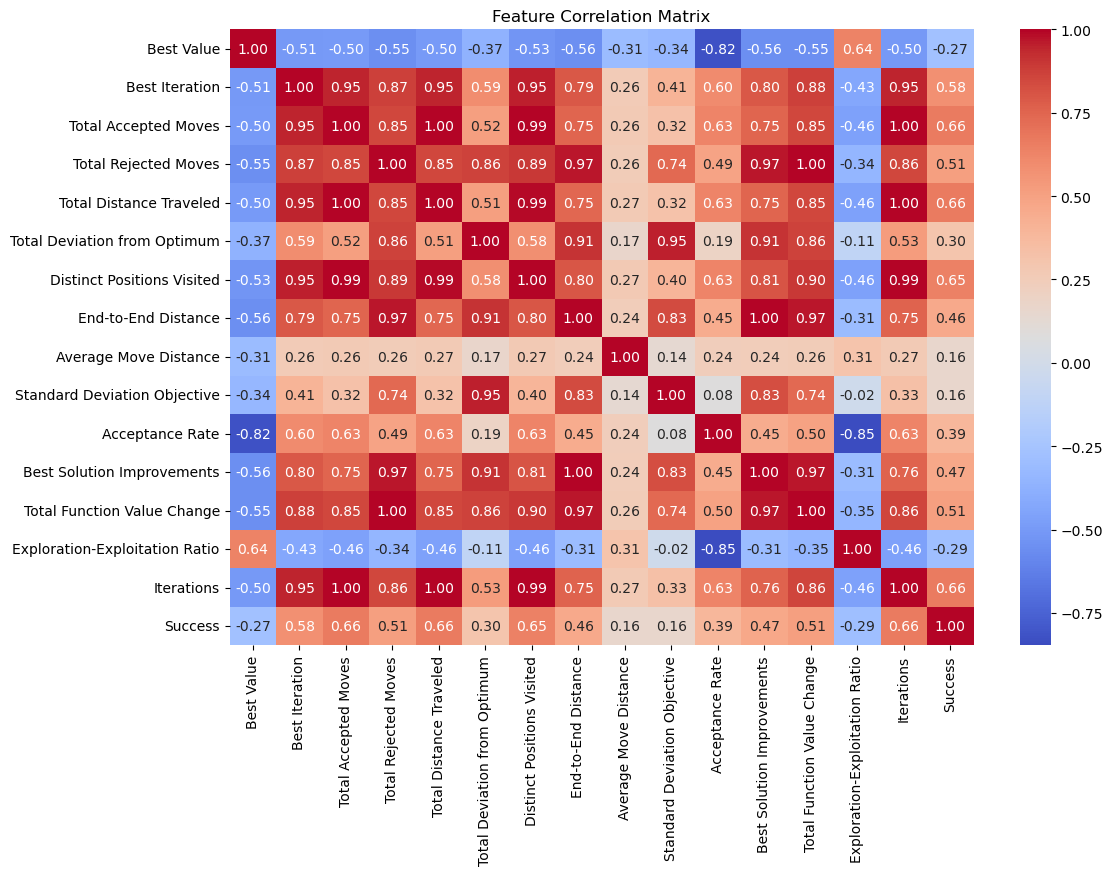

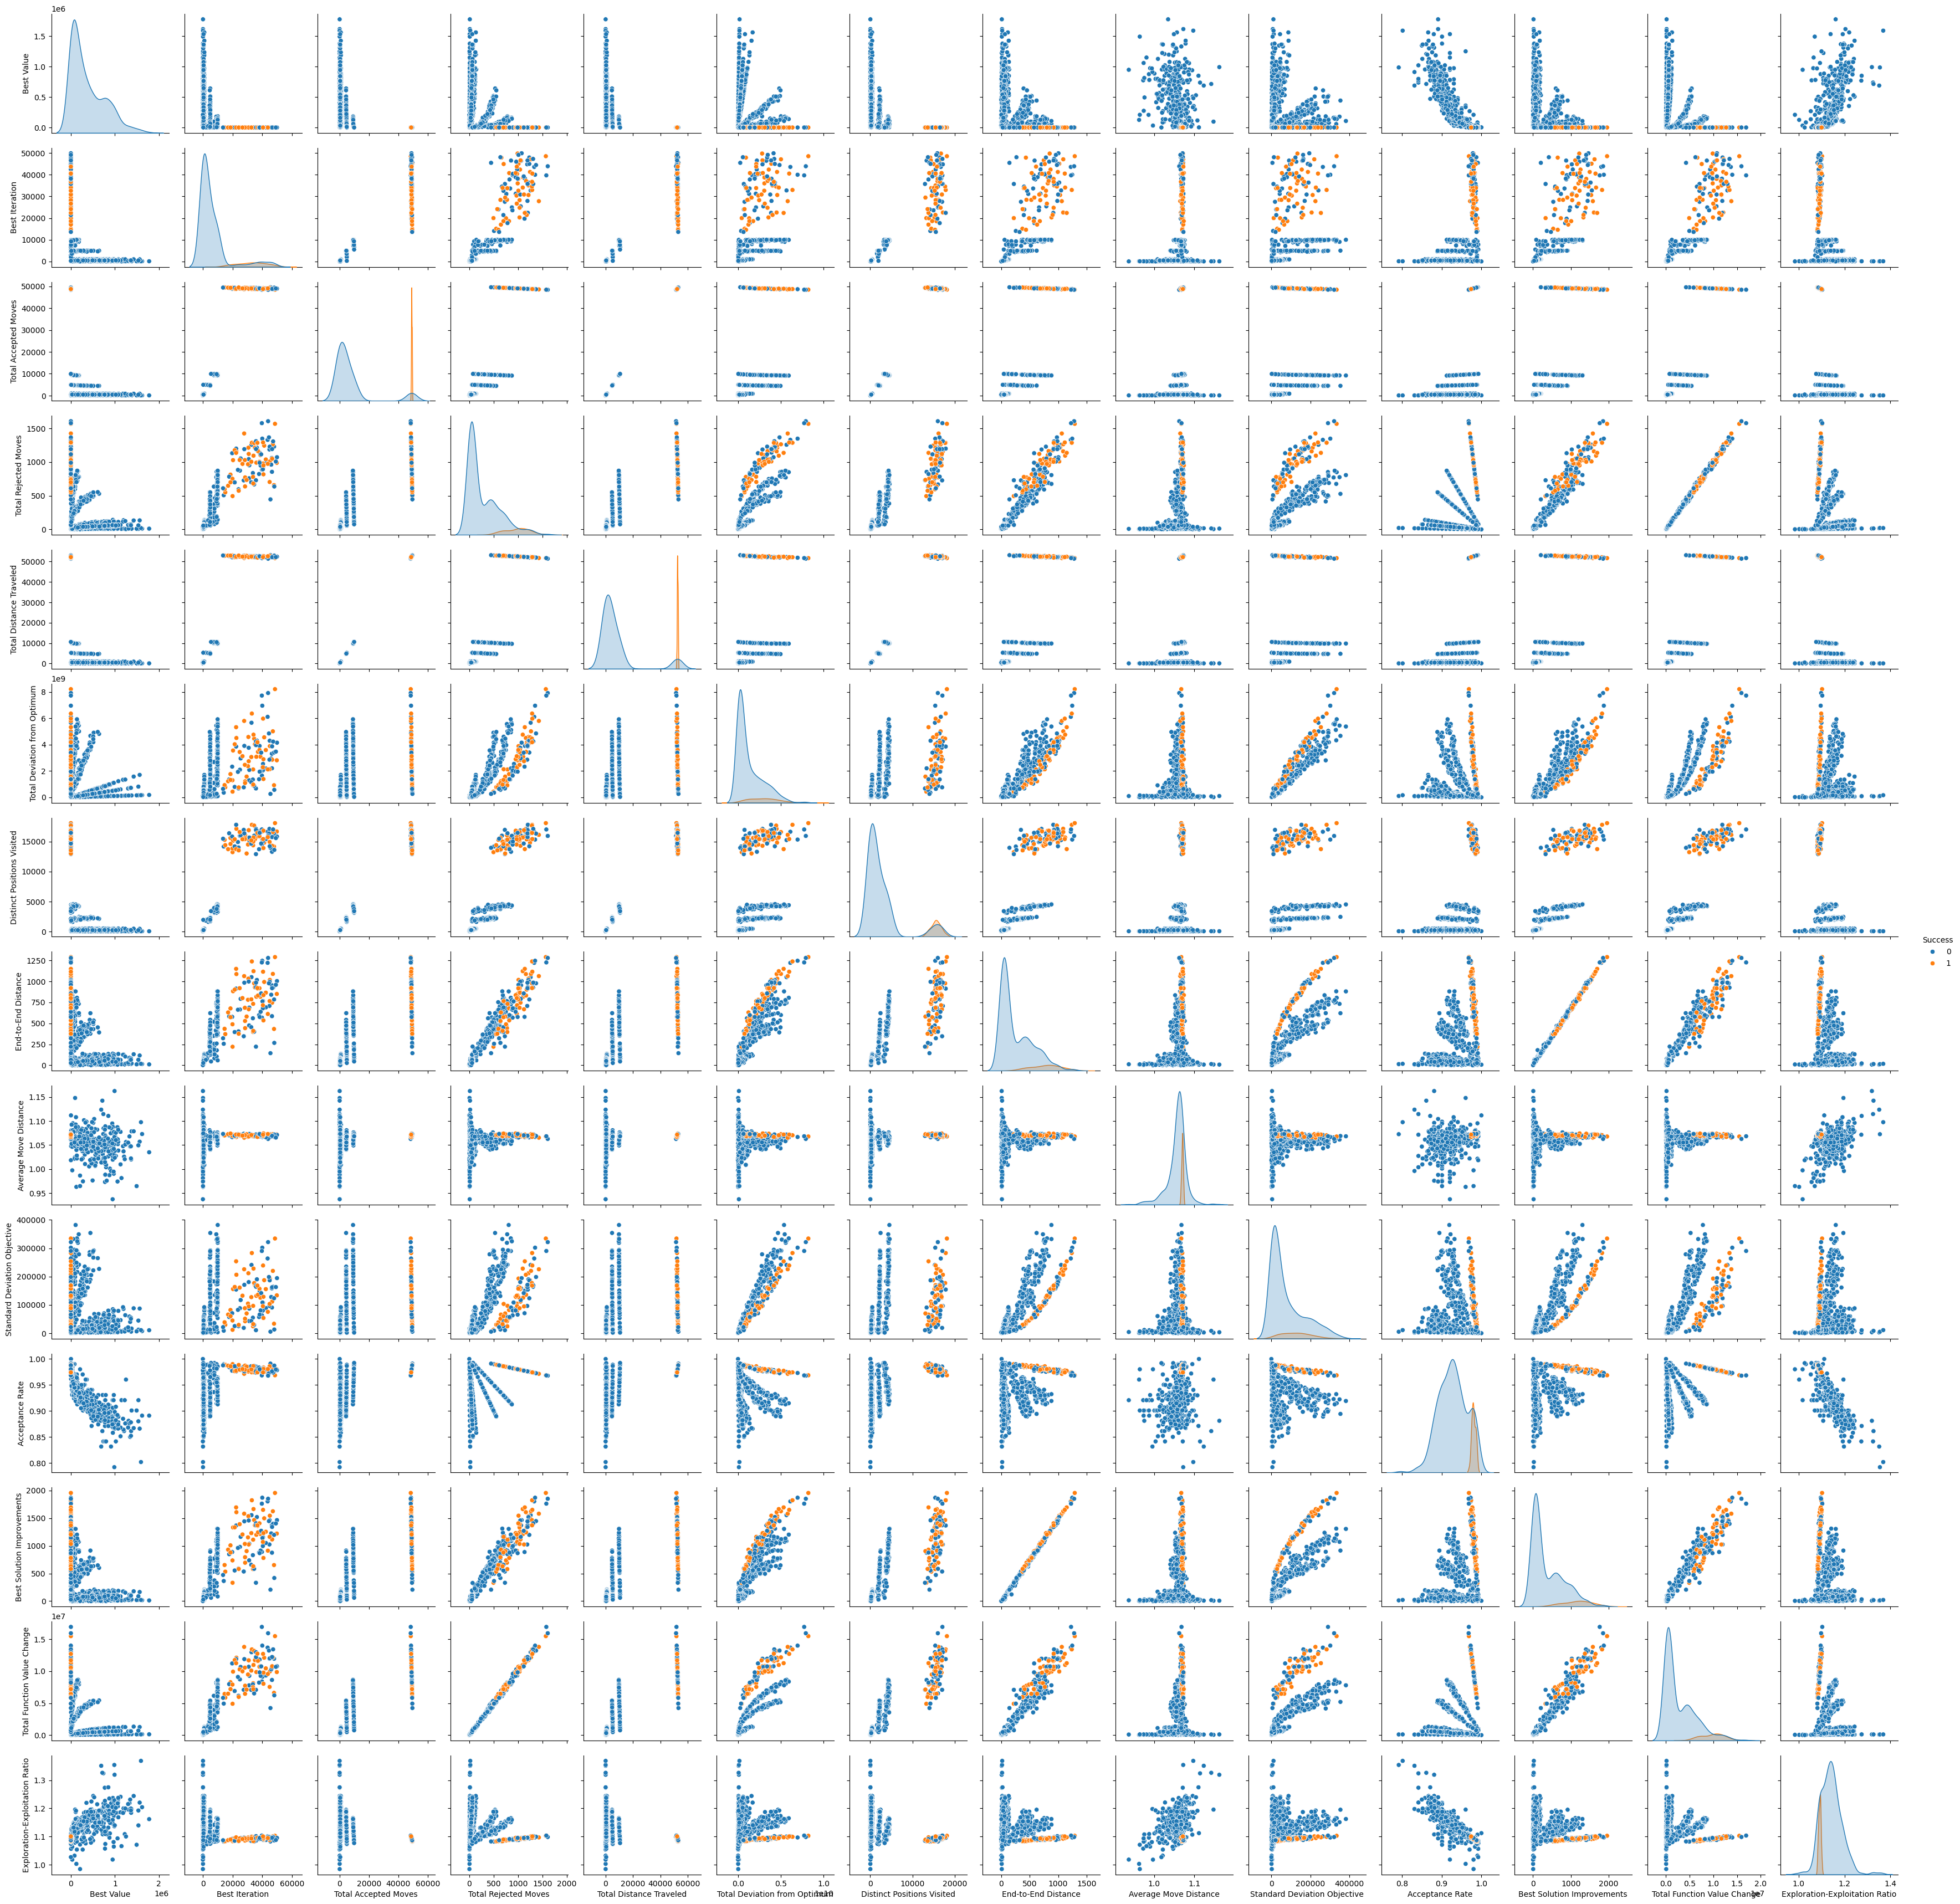

In [63]:
# Visualization: Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Pairplot with hue set to 'Success'
sns.pairplot(df_combined, hue="Success", diag_kind="kde", height=2.5)
plt.show()


#run for 100 and try to decide whether if it were to run for 1000 is it likely to reach the optima take my 100 and run it then for 1000 my first 100 are my feature vector and then we try extract to see if itll reach the 1000 which are the classifier 
#then pick the top 10 from the 100 
#the clupatra sequence representation can be the feature vector including the stuff above 

#is it doing well so far and is it worth continuing 
#have to specify enough that someone can repeat my experiment without having to point at a screen
#just what not why just yet 
#it needs a way of using the clupatra sequence to decide whether its going into a valley or ridge using for models 
#make a hypothesis and systematically test it 

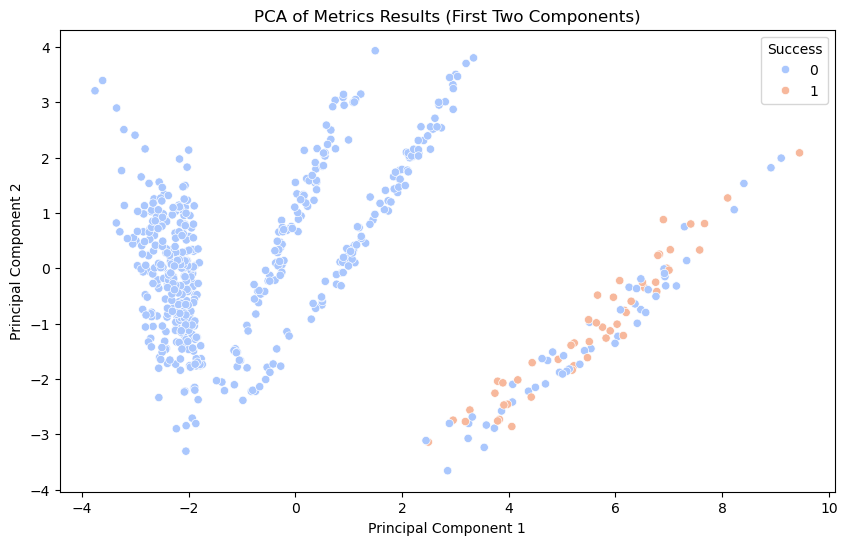

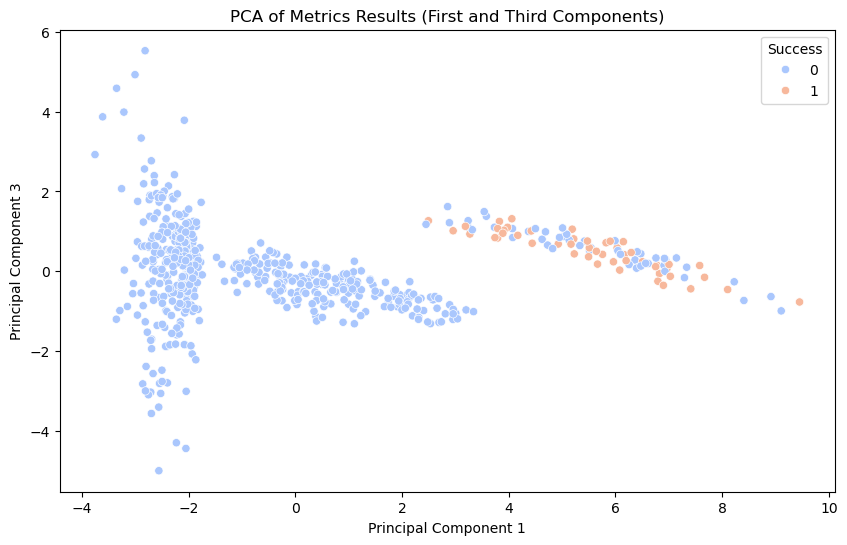

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       164
           1       0.38      0.31      0.34        16

    accuracy                           0.89       180
   macro avg       0.66      0.63      0.64       180
weighted avg       0.89      0.89      0.89       180

Confusion Matrix:
 [[156   8]
 [ 11   5]]


In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Preprocess the Data
# Separate features and target
X = df_combined.drop(columns=['Success', 'Best Value', 'Iterations']) 
y = df_combined['Success']  # Target for classification

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: PCA
pca = PCA(n_components=3)  # Updated to use 3 components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
pca_df['Success'] = y.reset_index(drop=True)  # Add success label for visualization

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='Success', palette='coolwarm')
plt.title("PCA of Metrics Results (First Two Components)")
plt.show()

# Visualize the third principal component against the first
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 3', hue='Success', palette='coolwarm')
plt.title("PCA of Metrics Results (First and Third Components)")
plt.show()

# Train-test split using the PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))